In [7]:
%load_ext autoreload
import matplotlib.pyplot as plt
import numpy as np
from sciplotlib import style as spstyle
from sciplotlib import polish as sppolish
from sciplotlib import text as spltext

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
group_a = np.random.normal(loc=1, size=50)
group_b = np.random.normal(loc=3, size=50)

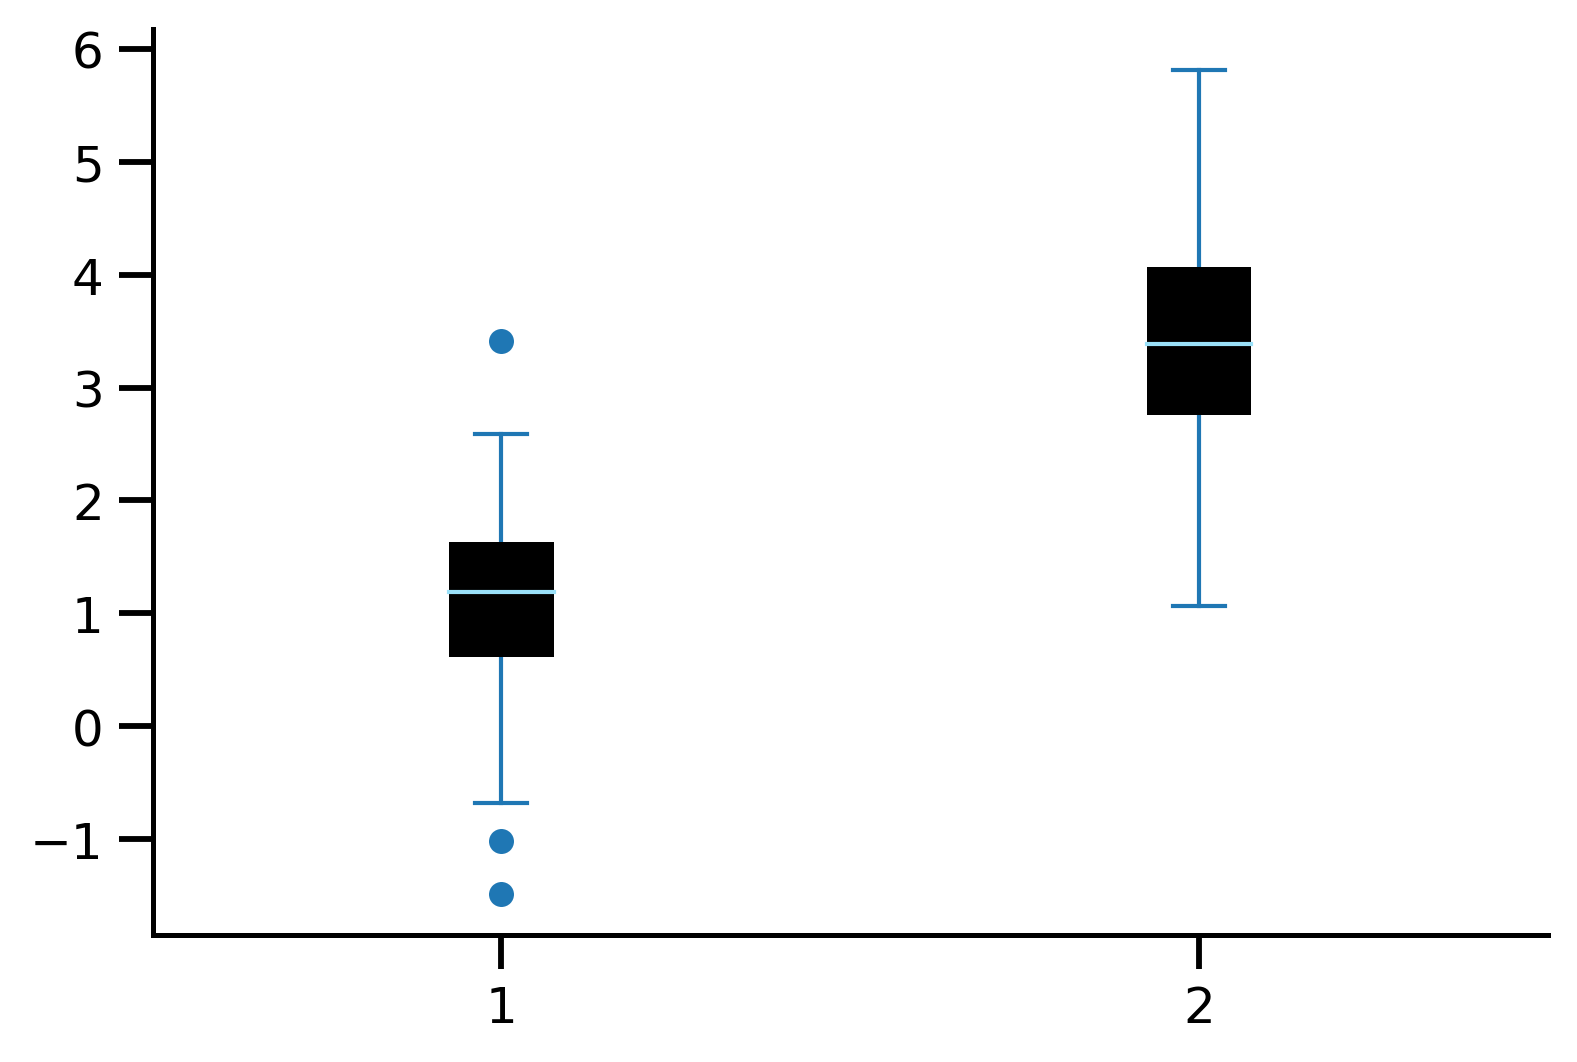

In [4]:
with plt.style.context(spstyle.get_style('nature-reviews')):
    
    fig, ax = plt.subplots()
    ax.boxplot([group_a, group_b])
    


In [7]:
ax.lines

In [8]:
ax.patch

In [15]:
ax.get_children()[0].get_xdata()


array([1., 1.])

In [34]:
def get_axes_object_max(ax, x_loc=1, object_type='line', verbose=False):
    
    if object_type == 'line':
        axes_objects = ax.lines
    else:
        axes_objects = ax.get_children()
        
    y_data_store = list()
    
    for ax_obj in axes_objects:
        
        if x_loc in ax_obj.get_xdata():
    
            if verbose:
                print(ax_obj.get_xdata())
                print(ax_obj.get_ydata())
            y_data_store.extend(ax_obj.get_ydata())
            
    return np.max(y_data_store)
    
    

In [26]:
get_axes_object_max(ax)

[1. 1.]
[ 0.61105866 -0.67535662]
[1. 1.]
[1.63485184 2.58495035]
[1. 1. 1.]
[-1.01755759 -1.48439031  3.41194047]


3.4119404690170674

## Adding signifance values

https://github.com/webermarcolivier/statannot/blob/master/statannot/statannot.py

In [9]:
def get_axes_object_max(ax, x_loc=1, object_type='line', verbose=False):
    """
    Obtains the maximum height of any matplotlib object given a specific x location.

    Parameters
    ----------
    ax
    x_loc
    object_type
    verbose

    Returns
    -------

    """
    if object_type == 'line':
        axes_objects = ax.lines
    else:
        axes_objects = ax.get_children()

    y_data_store = list()

    for ax_obj in axes_objects:

        if x_loc in ax_obj.get_xdata():

            if verbose:
                print(ax_obj.get_xdata())
                print(ax_obj.get_ydata())
            y_data_store.extend(ax_obj.get_ydata())

    return np.max(y_data_store)

In [10]:
def add_stat_annot(fig, ax, x_start_list, x_end_list, 
                   y_start_list=None, y_end_list=None,
                   line_height=2, stat_list=['*'],
                    text_y_offset=0.2, text_x_offset=-0.01):
    """
    

    """
    
    if type(x_start_list) is not list:
        x_start_list = [x_start_list]
    
    
    for x_start, x_end, y_start, y_end, stat in zip(x_start_list, x_end_list, 
                   y_start_list, y_end_list, stat_list):
        
        if y_start is None:
            y_start = get_axes_object_max(ax, x_loc=x_start, object_type='line') + line_height
        if y_end is None:
            max_at_x_end = get_axes_object_max(ax, x_loc=x_end, object_type='line') 
            print(max_at_x_end)
            y_end = max_at_x_end + line_height
        
        y_start_end_max = np.max([y_start, y_end])
        
 
        sig_line = ax.plot([x_start,x_start, x_end, x_end], 
                    [y_start, y_start_end_max+line_height, y_start_end_max+line_height, y_end], 
                    linewidth=1, color='k')
            
        
        ax.text(x=(x_start + x_end)/2 + text_x_offset,
                y=y_start_end_max+line_height+text_y_offset,
                s=stat, horizontalalignment='center')
        
    
    return fig, ax

5.491549875767577
6.080485480133259


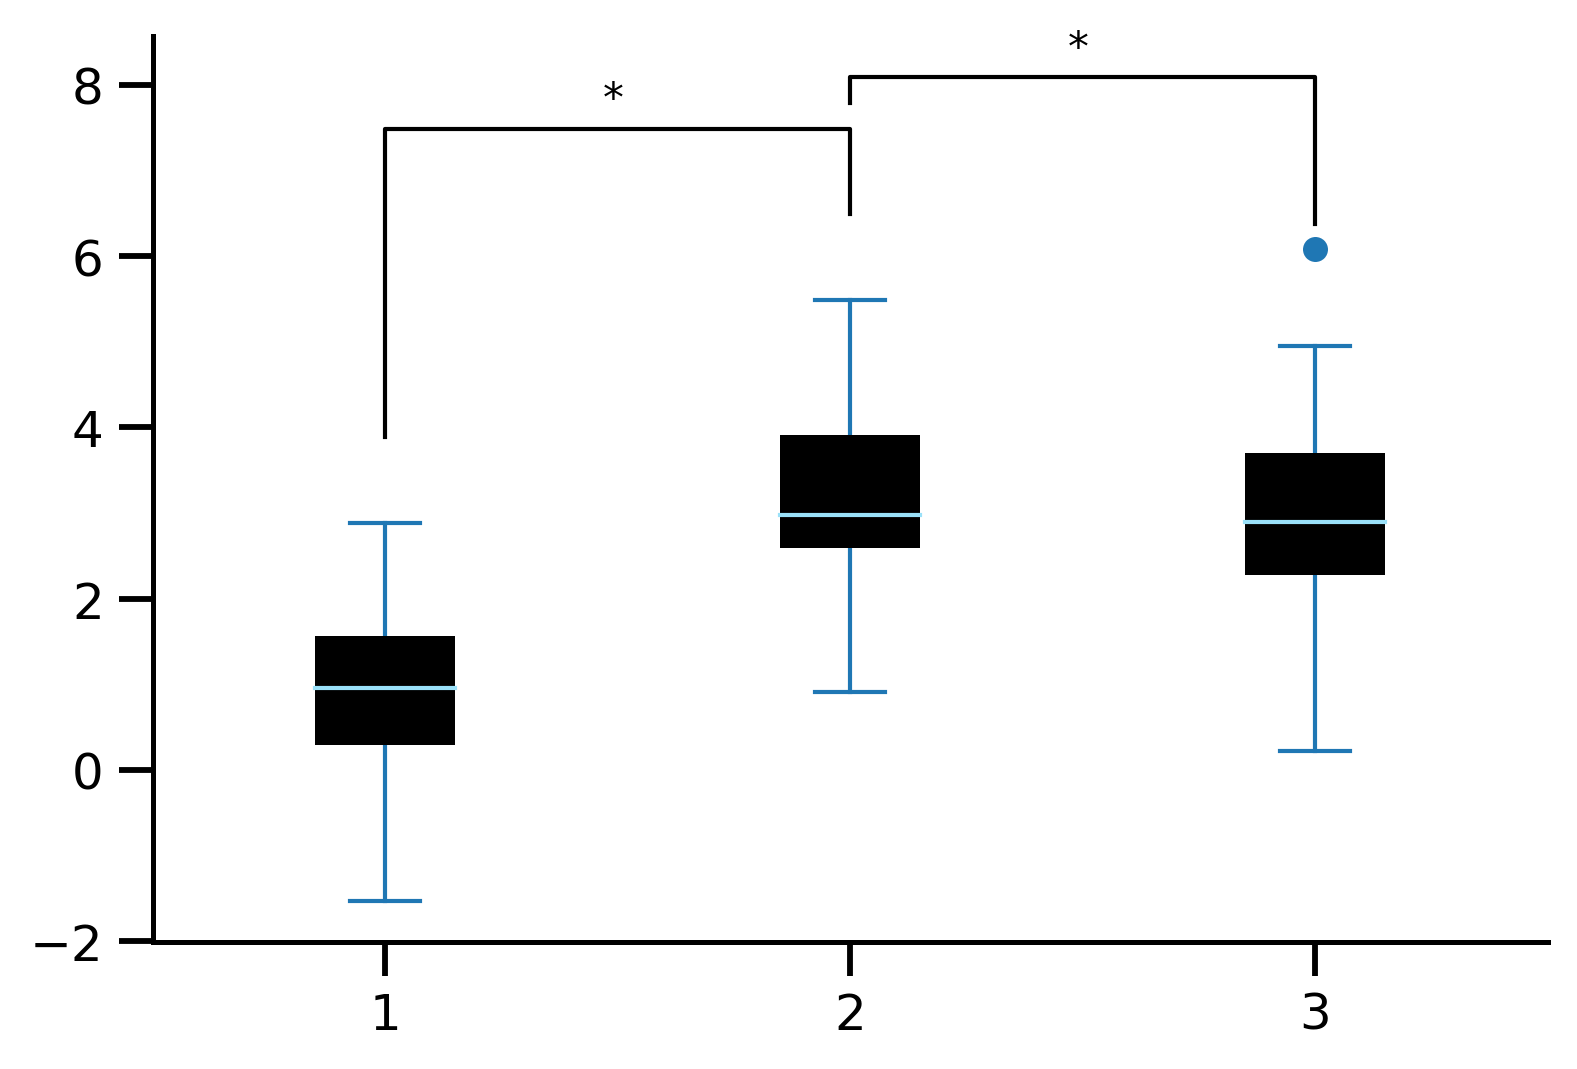

In [43]:
group_a = np.random.normal(loc=1, size=50)
group_b = np.random.normal(loc=3, size=50)
group_c = np.random.normal(loc=3, size=50)
with plt.style.context(spstyle.get_style('nature-reviews')):
    
    fig, ax = plt.subplots()

    ax.boxplot([group_a, group_b, group_c])
    
    fig, ax = add_stat_annot(fig, ax, [1], [2], [None], [None], line_height=1)
    fig, ax = add_stat_annot(fig, ax, [2], [3], [None], [None], line_height=0.3)

## Modifying colors of the boxplot

5.2954873099759014
5.763550423447088


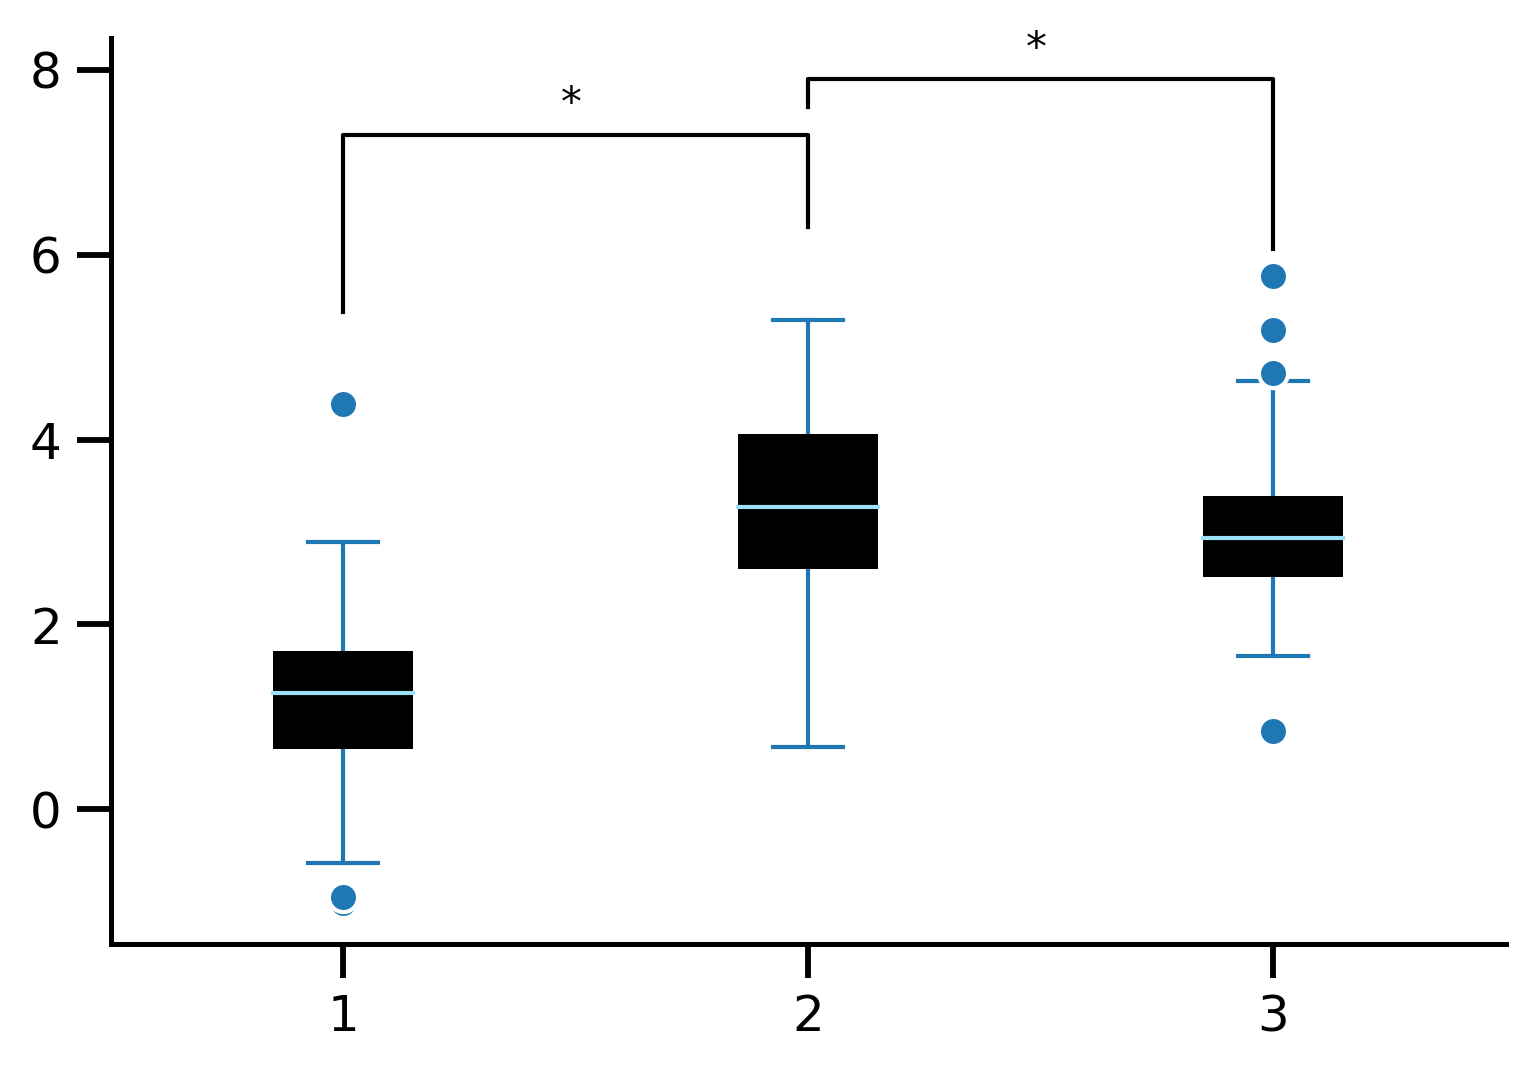

In [11]:
%autoreload
group_a = np.random.normal(loc=1, size=50)
group_b = np.random.normal(loc=3, size=50)
group_c = np.random.normal(loc=3, size=50)
with plt.style.context('/home/timsit/sciplotlib/sciplotlib/stylesheets/nature-reviews.mplstyle'):
    
    fig, ax = plt.subplots()

    ax.boxplot([group_a, group_b, group_c])
    
    fig, ax = add_stat_annot(fig, ax, [1], [2], [None], [None], line_height=1)
    fig, ax = add_stat_annot(fig, ax, [2], [3], [None], [None], line_height=0.3)